# Importing libraries📚

In [ ]:
!pip3 install seaborn==0.11.0
!pip install seaborn==0.11.0

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
import pandas as pd
import seaborn as sns
import datatable as dt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from colorama import Fore, Back, Style
red = Fore.RED
grn = Fore.GREEN
blu = Fore.BLUE
ylw = Fore.YELLOW
wht = Fore.WHITE

import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
print(sns.__version__) 
'''We use seaborn version 0.11.0 to use histplot in PairPlot'''

# Getting data 💽

In [ ]:
path = '../input/tabular-playground-series-jan-2021/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
print(f'{train.shape}\n{test.shape}\n{sample.shape}')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
sample.head()

In [ ]:
print('number of null columns in train set :- ',np.sum(train.isnull().sum() > 0))
print('number of null columns in test set :-',np.sum(test.isnull().sum() > 0 ))

We see that there are no null values in train and test set

In [ ]:
features = [f'cont{x}'for x in range(1,15)]
target = ['target']

In [ ]:
all_data = train[features+['id']].append(test)

In [ ]:
all_data.head()

# EDA 📊📊

In [ ]:
def plot_distribution(ds,feature,color):
    plt.figure(dpi=125)
    sns.distplot(ds[feature],color=color);
    print("{}Max value of {} is {}\n{}Min value of {} is {}\n{}Mean value of {} is {}\n{}Std value of {} is {}\n{}Median value of {} is {}".format(red,feature,ds[feature].max(),blu,feature,ds[feature].min(),grn,feature,ds[feature].mean(),ylw,feature,ds[feature].std(),wht,feature,ds[feature].median()));

## Pair Grid

In [ ]:
def plot_grid(ds,c1,c2,c3):
    f = sns.PairGrid(ds[:100]);
    plt.figure(figsize=(10,10));
    f.map_upper(plt.scatter,color = c1);
    f.map_lower(sns.kdeplot,color = c2);
    #f.map_diag(sns.histplot,color = c3 );
    f.map_diag(sns.kdeplot, lw=3, legend=False,color = c3);

### Train Data

In [ ]:
plot_grid(all_data[features],'lightgreen','magenta','red');

### Test Data

In [ ]:
plot_grid(test,'limegreen','darkmagenta','seagreen');

##  Correlation Matrix 🎵🎵

In [ ]:
corr1,corr2,corr3 = train[features].corr(),train[features].corr(method='pearson'),train[features].corr(method='spearman');
plt.figure(figsize=(12,9));
fig = ex.imshow(corr1);
fig.show();

cont 6 to cont 13 are somewhat related.. not much though

In [ ]:
plt.figure(figsize=(12,9))
fig2 = sns.heatmap(corr2, annot=True, cmap="mako")
plt.show()

In [ ]:
plt.figure(figsize=(12,9))
fig2 = sns.heatmap(corr3, annot=True, cmap="rocket_r")
plt.show()

## Feature Distibutions 📈📈

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(3,5,1)
sns.kdeplot(train['cont1'],color='#4285F4',shade=True,alpha=0.8);
plt.subplot(3,5,2)
sns.kdeplot(train['cont2'],color='#7D0552',shade=True,alpha=0.8);
plt.subplot(3,5,3)
sns.kdeplot(train['cont3'],color='#7FFFD4',shade=True,alpha=0.8);
plt.subplot(3,5,4)
sns.kdeplot(train['cont4'],color='#C04000',shade=True,alpha=0.8);
plt.subplot(3,5,5)
sns.kdeplot(train['cont5'],color='#4285F4',shade=True,alpha=0.8);
plt.subplot(3,5,6)
sns.kdeplot(train['cont6'],color='#F88017',shade=True,alpha=0.8);
plt.subplot(3,5,7)
sns.kdeplot(train['cont7'],color='#4285F4',shade=True,alpha=0.8);
plt.subplot(3,5,8)
sns.kdeplot(train['cont8'],color='#78C7C7',shade=True,alpha=0.8);
plt.subplot(3,5,9)
sns.kdeplot(train['cont9'],color='#728C00',shade=True,alpha=0.8);
plt.subplot(3,5,10)
sns.kdeplot(train['cont10'],color='#254117',shade=True,alpha=0.8);
plt.subplot(3,5,11)
sns.kdeplot(train['cont11'],color='#6CC417',shade=True,alpha=0.8);
plt.subplot(3,5,12)
sns.kdeplot(train['cont12'],color='#CCFB5D',shade=True,alpha=0.8);
plt.subplot(3,5,13)
sns.kdeplot(train['cont13'],color='#6A287E',shade=True,alpha=0.8);
plt.subplot(3,5,14)
sns.kdeplot(train['cont14'],color='#E3319D',shade=True,alpha=0.8);
plt.subplot(3,5,15)
sns.kdeplot(train['target'],color='#E3319D',shade=True,alpha=0.8);

We can see some similarities between some of the features🤔🤔

In [ ]:
plot_distribution(train,'target','blue')

We see 2 spikes from the median of the distribution. We can split the dataset from the medain. Suggested by [maunish](https://www.kaggle.com/maunish).

In [ ]:
lesser,greater = train[train['target'] <= train['target'].median()],train[train['target'] >= train['target'].median()] 

In [ ]:
plt.figure(figsize=(30.8,15))
plt.subplot(3,5,1)
sns.kdeplot(lesser['cont1'],color='#4285F4',shade=True,alpha=0.2);
sns.kdeplot(greater['cont1'],color='#4F2083',shade=True,alpha=0.8);
plt.subplot(3,5,2)
sns.kdeplot(lesser['cont2'],color='#7D0852',shade=True,alpha=0.2);
sns.kdeplot(greater['cont2'],color='#43A45F',shade=True,alpha=0.8);
plt.subplot(3,5,3)
sns.kdeplot(lesser['cont3'],color='#350836',shade=True,alpha=0.2);
sns.kdeplot(greater['cont3'],color='#7FFFD4',shade=True,alpha=0.8);
plt.subplot(3,5,4)
sns.kdeplot(lesser['cont4'],color='#C08408',shade=True,alpha=0.2);
sns.kdeplot(greater['cont4'],color='#DA6DBD',shade=True,alpha=0.8);
plt.subplot(3,5,5)
sns.kdeplot(lesser['cont5'],color='#4285F4',shade=True,alpha=0.2);
sns.kdeplot(greater['cont5'],color='#FD376A',shade=True,alpha=0.8);
plt.subplot(3,5,6)
sns.kdeplot(lesser['cont6'],color='#F88017',shade=True,alpha=0.2);
sns.kdeplot(greater['cont6'],color='#508352',shade=True,alpha=0.8);
plt.subplot(3,5,7)
sns.kdeplot(lesser['cont7'],color='#4285F4',shade=True,alpha=0.2);
sns.kdeplot(greater['cont7'],color='#1FCDCB',shade=True,alpha=0.8);
plt.subplot(3,5,8)
sns.kdeplot(lesser['cont8'],color='#A3FC08',shade=True,alpha=0.2);
sns.kdeplot(greater['cont8'],color='#78C7C7',shade=True,alpha=0.8);
plt.subplot(3,5,9)
sns.kdeplot(lesser['cont9'],color='#EDEE2C',shade=True,alpha=0.2);
sns.kdeplot(greater['cont9'],color='#728C08',shade=True,alpha=0.8);
plt.subplot(3,5,10.8)
sns.kdeplot(lesser['cont10'],color='#254117',shade=True,alpha=0.2);
sns.kdeplot(greater['cont10'],color='#9717A9',shade=True,alpha=0.8);
plt.subplot(3,5,11)
sns.kdeplot(lesser['cont11'],color='#6CC417',shade=True,alpha=0.2);
sns.kdeplot(greater['cont11'],color='#872B93',shade=True,alpha=0.8);
plt.subplot(3,5,12)
sns.kdeplot(lesser['cont12'],color='#C13408',shade=True,alpha=0.2);
sns.kdeplot(greater['cont12'],color='#CCFB5D',shade=True,alpha=0.8);
plt.subplot(3,5,13)
sns.kdeplot(lesser['cont13'],color='#6A287E',shade=True,alpha=0.2);
sns.kdeplot(greater['cont13'],color='#CCFB5D',shade=True,alpha=0.8);
plt.subplot(3,5,14)
sns.kdeplot(lesser['cont14'],color='#E3319D',shade=True,alpha=0.2);
sns.kdeplot(greater['cont14'],color='#203E8B',shade=True,alpha=0.8);
plt.subplot(3,5,15)
sns.kdeplot(lesser['target'],color='#D8AB59',shade=True,alpha=0.2);
sns.kdeplot(greater['target'],color='#C61923',shade=True,alpha=0.8);

# Trying some things on target

#### I think 0.0 value for target is an outlier..

In [ ]:
train = train[train['target'] > 5]

In [ ]:
plot_distribution(train,'target','purple')

#### As we can see it was an outlier

# LGBM Model + Optuna❤️‍🔥

## Metrics 📐

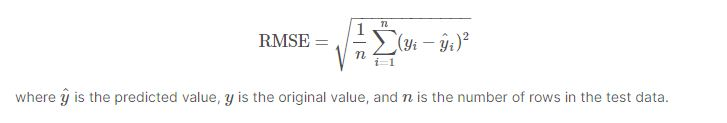

In [ ]:
def rmse_score(yreal, yhat):
    return sqrt(mean_squared_error(yreal, yhat))

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import optuna
from math import sqrt

In [ ]:
train_ds = train.loc[:,features]
y_train = train.loc[:,target]

val_ds = test.loc[:,features]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_ds = sc.fit_transform(train_ds)
val_ds = sc.transform(val_ds)

The performance of XGBoost and LGBM was the best of all.. so we use those two and adding catboost

In [ ]:
X, X_val, y, y_val = train_test_split(train_ds, y_train, test_size=0.35,random_state=43)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)

In [ ]:
lgb_train = lgb.Dataset(X,y)
lgb_valid = lgb.Dataset(X_val,y_val,reference=lgb_train)

In [ ]:
def objective(trial):    
    params = {
            'num_leaves': trial.suggest_int('num_leaves', 32, 512),
            'boosting_type': 'gbdt',
            'max_bin': trial.suggest_int('max_bin', 700, 900),
            'objective': 'regression',
            'metric': 'RMSE',
            'learning_rate': trial.suggest_float('learning_rate',0.0155,0.05),
            'random_state' : 17,
            'max_depth': trial.suggest_int('max_depth', 4, 16),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 16),
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 8),
            'min_child_samples': trial.suggest_int('min_child_samples', 4, 80),
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1.0),
            'early_stopping_rounds': 10
            }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_valid], verbose_eval=100, num_boost_round=800)
    y_pred  = model.predict(X_val)
    score = rmse_score(y_val, y_pred)
    print(f"RMSE = {score}")
    return score

In [ ]:
study = optuna.create_study(direction = 'minimize')
study.optimize(objective,n_trials = 50)

In [ ]:
print(f"Trials : {len(study.trials)}")
print(f"Best Trial : {study.best_trial}")
best = study.best_trial
for i, j in best.params.items():
    print(f"{i} : {j}")
print(f"{best.value}")

In [ ]:
best_params = best.params
'''{'num_leaves': 308, 'max_bin': 851, 'learning_rate': 0.016284194606204783, 'max_depth': 15, 'min_child_weight': 12, 'feature_fraction': 0.40359336306503796, 'bagging_fraction': 0.7724641122395841, 'bagging_freq': 4, 'min_child_samples': 62, 'lambda_l1': 9.077642086628708e-08, 'lambda_l2': 0.13127095700079588}, distributions={'num_leaves': IntUniformDistribution(high=512, low=32, step=1), 'max_bin': IntUniformDistribution(high=900, low=700, step=1), 'learning_rate': UniformDistribution(high=0.05, low=0.0155), 'max_depth': IntUniformDistribution(high=16, low=4, step=1), 'min_child_weight': IntUniformDistribution(high=16, low=1, step=1), 'feature_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_freq': IntUniformDistribution(high=8, low=1, step=1), 'min_child_samples': IntUniformDistribution(high=80, low=4, step=1), 'lambda_l1': LogUniformDistribution(high=1.0, low=1e-08), 'lambda_l2': LogUniformDistribution(high=1.0, low=1e-08)}''';

In [ ]:
model = lgb.train(best_params, lgb_train, valid_sets=[lgb_train,lgb_valid],verbose_eval=50,num_boost_round=700)

In [ ]:
preds  = model.predict(X_val,num_iteration=model.best_iteration)

In [ ]:
print('LGBM: RMSE %.6f' % (rmse_score(y_val, preds)))

In [ ]:
print(features)
lgb.plot_importance(model,importance_type='gain')
lgb.plot_importance(model);

In [ ]:
train_preds = model.predict(train_ds)

In [ ]:
print('LGBM: Train RMSE %.6f' % (rmse_score(y_train, train_preds)))

In [ ]:
train['t_preds'] = train_preds

In [ ]:
sns.jointplot(x = 'target', y = 't_preds',data = train,joint_kws={'alpha' : 0.3},color = 'goldenrod');
plt.show()

# My Submission 🙋‍♂️

In [ ]:
preds = model.predict(val_ds)

In [ ]:
preds

In [ ]:
sub = pd.DataFrame({'id':test.id, 'target':preds})
sub.to_csv('submission.csv',index=False)

In [ ]:
sub.head()

In [ ]:
x = pd.read_csv('./submission.csv')
x.head()

# Work in Progress🚧🚧